<h2>Week - 4 Assignment - Impact of high-school neighborhood business environment in Public Education </h2>

In [15]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


<h1> Claim validation for the Top High School in New Jersey </h1>

<h3>Check the ELA ( Engish, Langauge, Art) performance for all schools in MONMOUTH county, that has the Top High School "HIGH Technology High School" in New Jersey. ELA analysis confirms the Top High school. </h3>

In [16]:
##Check the ELA ( Engish, Langauge, Art) performance for all schools in MANMOUTH county, that has the 
##Top High School "HIGH Technology High School" in New Jersey
nj_ELAPerf_df=pd.read_excel('MONMOUTH_NJ_SCHOOLS_ELAPERF.xlsx');

nj_ELAPerf_df2=nj_ELAPerf_df[nj_ELAPerf_df['SchoolName'].str.contains('HIGH SCHOOL')]
#print(nj_ELAPerf_df2.head())
nj_ELAPerf_df3=nj_ELAPerf_df2[['SchoolName', "SchoolPerformance"]]
nj_ELAPerf_df3 = nj_ELAPerf_df3[~nj_ELAPerf_df3['SchoolPerformance'].isin(['N','*'])];
nj_ELAPerf_df3['SchoolPerformance']=nj_ELAPerf_df3["SchoolPerformance"].astype('float32')
#print(nj_ELAPerf_df3)
df1=nj_ELAPerf_df3.groupby(['SchoolName']).agg({'SchoolPerformance':['mean']}).reset_index()
df1.columns = (['SchoolName','School ELA Performance Percent'])
df1
df1.plot.barh(x='SchoolName', y='School ELA Performance Percent', sort_columns=True, figsize=(10,5), title="ELA Peformance for schools in the MONMOUTH county of Top High School")

<h3>Check the Math performance for all schools in MONMOUTH county, that has the Top High School "HIGH Technology High School" in New Jersey. Math analysis confirms the Top High school. </h3>

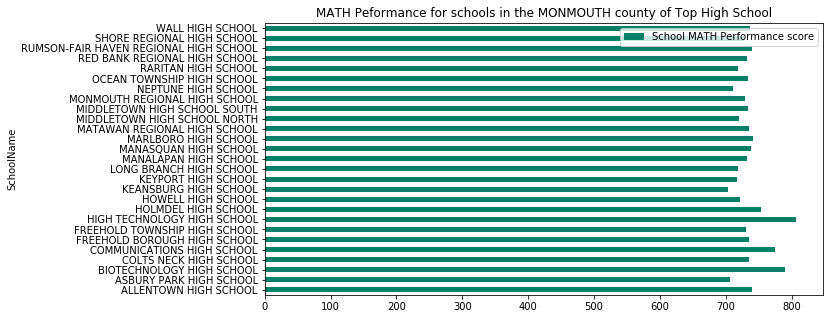

In [17]:
##Check the MATH performance for all schools in MANMOUTH county, that has the 
##Top High School "HIGH Technology High School" in New Jersey
nj_MATHPerf_df=pd.read_excel('MONMOUTH_NJ_MATHPerf.xlsx');
nj_MATHPerf_df2=nj_MATHPerf_df[nj_MATHPerf_df['SchoolName'].str.contains('HIGH SCHOOL')]
#print(nj_MATHPerf_df2.head())
nj_MATHPerf_df3=nj_MATHPerf_df2[['SchoolName', "MeanScore"]]

##Remove rows that have column value as "N" or "*"
nj_MATHPerf_df3 = nj_MATHPerf_df3[~nj_MATHPerf_df3['MeanScore'].isin(['N','*'])];
nj_MATHPerf_df3['MeanScore']=nj_MATHPerf_df3["MeanScore"].astype('float32')
#print(nj_MATHPerf_df3)
df1_math=nj_MATHPerf_df3.groupby(['SchoolName']).agg({'MeanScore':['mean']}).reset_index()
df1_math.columns = (['SchoolName','School MATH Performance score'])
df1_math
df1_math.plot.barh(x='SchoolName', y='School MATH Performance score', colormap='summer', sort_columns=True, figsize=(10,5), title="MATH Peformance for schools in the MONMOUTH county of Top High School")


<h3>Analyse Absenteeism for all schools in MONMOUTH county, that has the Top High School "HIGH Technology High School" in New Jersey. Low Absenteeism  and high math performance confirms the Top High school. </h3>

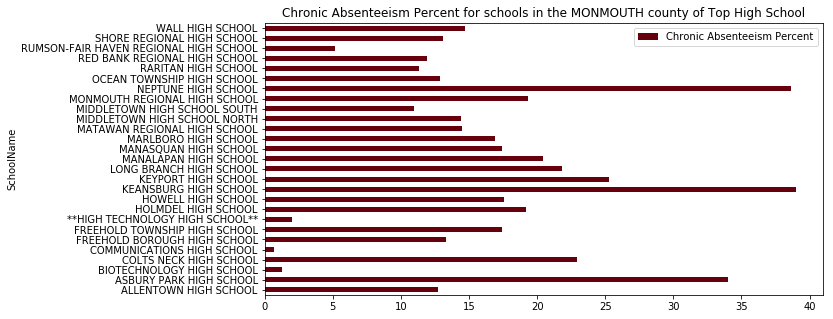

In [18]:
##Analyse the Abseteeism, lower the better for all schools in MANMOUTH county, that has the 
##Top High School "HIGH Technology High School" in New Jersey
nj_APerf_df=pd.read_excel('MONMOUTH_NJ_ABSENTEEISM.xlsx');
nj_APerf_df2=nj_APerf_df[nj_APerf_df['SchoolName'].str.contains('HIGH SCHOOL')]
#print(nj_APerf_df2.head())
nj_APerf_df3=nj_APerf_df2[['SchoolName', "Chronic_Abs_Pct"]]

##Remove rows that have column value as "N" or "*"
nj_APerf_df3 = nj_APerf_df3[~nj_APerf_df3['Chronic_Abs_Pct'].isin(['N','*'])];
nj_APerf_df3['Chronic_Abs_Pct']=nj_APerf_df3["Chronic_Abs_Pct"].astype('float32')
#print(nj_APerf_df3)
df1_abs=nj_APerf_df3.groupby(['SchoolName']).agg({'Chronic_Abs_Pct':['mean']}).reset_index()
df1_abs.columns = (['SchoolName','Chronic Absenteeism Percent'])

df1_abs.loc[df1_abs['SchoolName'] == 'HIGH TECHNOLOGY HIGH SCHOOL', 'SchoolName'] = "**HIGH TECHNOLOGY HIGH SCHOOL**"
#df1_abs
df1_abs.plot.barh(x='SchoolName', y='Chronic Absenteeism Percent', colormap='Reds_r', sort_columns=True, figsize=(10,5), title="Chronic Absenteeism Percent for schools in the MONMOUTH county of Top High School")

<h1> Validation of Top High School in Ohio </h1>

In [19]:
##Get the district IRN and school name mapping
oh_irn_to_name_df = pd.read_excel('OH_BUILDING-GRADES.xlsx', sheet_name='Building Grades')
oh_irn_to_name_df=oh_irn_to_name_df[['BUILDING NAME', 'DISTRICT IRN', 'GRADE SPAN']]
oh_irn_to_name_df=oh_irn_to_name_df[oh_irn_to_name_df['GRADE SPAN']== '7-12']
oh_irn_to_name_df.columns=['SchoolName', 'District IRN', 'GRADE SPAN']
oh_irn_to_name_df.head()

oh_district_df=pd.read_excel('Ohio_17-18_Achievement_District.xlsx', sheet_name='Performance_Indicators');
oh_hamilton_df=oh_district_df[oh_district_df['County'] == 'Hamilton']
oh_hamilton_df=oh_hamilton_df.join(oh_irn_to_name_df.set_index('District IRN'), on='District IRN', how='inner');
oh_hamilton_df.head()

,District IRN,District Name,County,Region,Address,City and Zip,Phone Number,Superintendent,Number of Standards Met,Number of Standards Possible,Percent of Standards Met,Letter Grade of Standards Met,Gifted Indicator,Chronic Absenteeism Rate 2017-18,Chronic Absenteeism Rate 2016-17,Chronic Absenteeism Indicator,3rd Grade Reading 2017-18 % at or above Proficient - District,3rd Grade Reading 2017-18 % at or above Proficient - Similar Dis,3rd Grade Reading 2017-18 % at or above Proficient - State,3rd Grade Math 2017-18 % at or above Proficient - District,3rd Grade Math 2017-18 % at or above Proficient - Similar Distri,3rd Grade Math 2017-18 % at or above Proficient - State,4th Grade Reading 2017-18 % at or above Proficient - District,4th Grade Reading 2017-18 % at or above Proficient - Similar Dis,4th Grade Reading 2017-18 % at or above Proficient - State,4th Grade Math 2017-18 % at or above Proficient - District,4th Grade Math 2017-18 % at or above Proficient - Similar Distri,4th Grade Math 2017-18 % at or above Proficient - State,5th Grade Reading 2017-18 % at or above Proficient - District,5th Grade Reading 2017-18 % at or above Proficient - Similar Dis,5th Grade Reading 2017-18 % at or above Proficient - State,5th Grade Math 2017-18 % at or above Proficient - District,5th Grade Math 2017-18 % at or above Proficient - Similar Distri,5th Grade Math 2017-18 % at or above Proficient - State,5th Grade Science 2017-18 % at or above Proficient - District,5th Grade Science 2017-18 % at or above Proficient - Similar Dis,5th Grade Science 2017-18 % at or above Proficient - State,6th Grade Reading 2017-18 % at or above Proficient - District,6th Grade Reading 2017-18 % at or above Proficient - Similar Dis,6th Grade Reading 2017-18 % at or above Proficient - State,6th Grade Math 2017-18 % at or above Proficient - District,6th Grade Math 2017-18 % at or above Proficient - Similar Distri,6th Grade Math 2017-18 % at or above Proficient - State,7th Grade Reading 2017-18 % at or above Proficient - District,7th Grade Reading 2017-18 % at or above Proficient - Similar Dis,7th Grade Reading 2017-18 % at or above Proficient - State,7th Grade Math 2017-18 % at or above Proficient - District,7th Grade Math 2017-18 % at or above Proficient - Similar Distri,7th Grade Math 2017-18 % at or above Proficient - State,8th Grade Reading 2017-18 % at or above Proficient - District,8th Grade Reading 2017-18 % at or above Proficient - Similar Dis,8th Grade Reading 2017-18 % at or above Proficient - State,8th Grade Math 2017-18 % at or above Proficient - District,8th Grade Math 2017-18 % at or above Proficient - Similar Distri,8th Grade Math 2017-18 % at or above Proficient - State,8th Grade Science 2017-18 % at or above Proficient - District,8th Grade Science 2017-18 % at or above Proficient - Similar Dis,8th Grade Science 2017-18 % at or above Proficient - State,HS Algebra I 2017-18 % at or above Proficient - District,HS Algebra I 2017-18 % at or above Proficient - Similar District,HS Algebra I 2017-18 % at or above Proficient - State,HS Biology 2017-18 % at or above Proficient - District,HS Biology 2017-18 % at or above Proficient - Similar District,HS Biology 2017-18 % at or above Proficient - State,HS English I 2017-18 % at or above Proficient - District,HS English I 2017-18 % at or above Proficient - Similar District,HS English I 2017-18 % at or above Proficient - State,HS English II 2017-18 % at or above Proficient - District,HS English II 2017-18 % at or above Proficient - Similar Distric,HS English II 2017-18 % at or above Proficient - State,HS Geometry 2017-18 % at or above Proficient - District,HS Geometry 2017-18 % at or above Proficient - Similar District,HS Geometry 2017-18 % at or above Proficient - State,HS Government 2017-18 % at or above Proficient - District,HS Government 2017-18 % at or above Proficient - Similar Distric,HS Government 2017-18 % at or above Proficient - State,HS History 2017-18 % at or above Proficient - District,HS History 201

<h3>Check the ELA performance for all schools in HAMILTON county, that has the Top High School "Walnut Hills High School" in Ohio.</h3>

/home/jupyterlab/conda/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


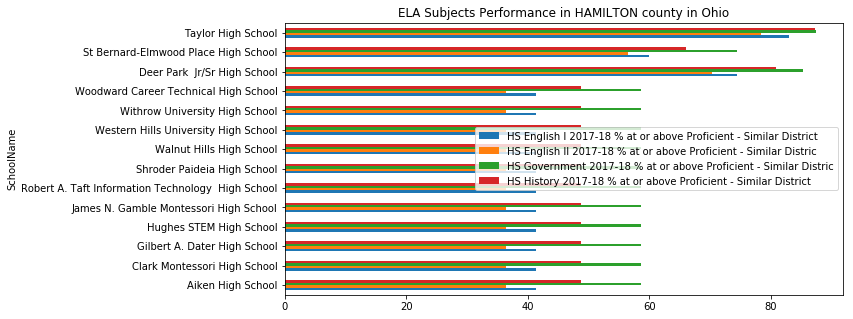

In [20]:
import warnings
warnings.filterwarnings(action='once')
oh_ela_hamilton=oh_hamilton_df[['SchoolName', \
                                 'HS English I 2017-18 % at or above Proficient - Similar District', \
                                 'HS English II 2017-18 % at or above Proficient - Similar Distric', \
                                 'HS Government 2017-18 % at or above Proficient - Similar Distric',
                                 'HS History 2017-18 % at or above Proficient - Similar District'\
                                ]]

oh_ela_hamilton['HS English I 2017-18 % at or above Proficient - Similar District']=\
    oh_ela_hamilton["HS English I 2017-18 % at or above Proficient - Similar District"].astype('float32');
oh_ela_hamilton['HS English II 2017-18 % at or above Proficient - Similar Distric']=\
    oh_ela_hamilton["HS English II 2017-18 % at or above Proficient - Similar Distric"].astype('float32');
oh_ela_hamilton['HS Government 2017-18 % at or above Proficient - Similar Distric']=\
    oh_ela_hamilton["HS Government 2017-18 % at or above Proficient - Similar Distric"].astype('float32');
oh_ela_hamilton['HS History 2017-18 % at or above Proficient - Similar District']=\
    oh_ela_hamilton["HS History 2017-18 % at or above Proficient - Similar District"].astype('float32');
                
oh_ela_hamilton=oh_ela_hamilton.set_index('SchoolName')
oh_ela_hamilton
ax = oh_ela_hamilton.plot.barh(figsize=(10,5), title='ELA Subjects Performance in HAMILTON county in Ohio');

<h3>Check the Math performance for all schools in HAMILTON county, that has the Top High School "Walnut Hills High School" in Ohio. Math analysis revealing all schools in the county are in the same math levels </h3>

/home/jupyterlab/conda/lib/python3.6/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/home/jupyterlab/conda/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/home/jupyterlab/conda/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus

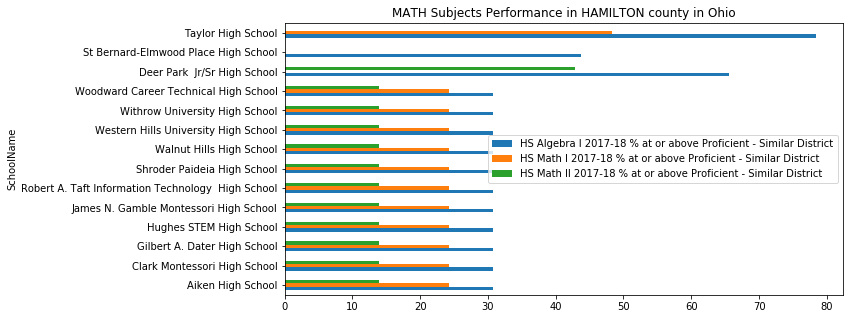

In [21]:
import warnings
warnings.filterwarnings(action='once')
oh_math_hamilton=oh_hamilton_df[['SchoolName', \
                                 'HS Algebra I 2017-18 % at or above Proficient - Similar District', \
                                 'HS Math I 2017-18 % at or above Proficient - Similar District', \
                                 'HS Math II 2017-18 % at or above Proficient - Similar District'\
                                ]]
oh_math_hamilton.loc[oh_math_hamilton['HS Math I 2017-18 % at or above Proficient - Similar District'] == "NC", \
                    'HS Math I 2017-18 % at or above Proficient - Similar District'] = 0;
oh_math_hamilton.loc[oh_math_hamilton['HS Math II 2017-18 % at or above Proficient - Similar District']=='NC',\
                     'HS Math II 2017-18 % at or above Proficient - Similar District']=0

oh_math_hamilton['HS Algebra I 2017-18 % at or above Proficient - Similar District']=\
    oh_math_hamilton["HS Algebra I 2017-18 % at or above Proficient - Similar District"].astype('float32');
oh_math_hamilton['HS Math I 2017-18 % at or above Proficient - Similar District']=\
    oh_math_hamilton["HS Math I 2017-18 % at or above Proficient - Similar District"].astype('float32');
oh_math_hamilton['HS Math II 2017-18 % at or above Proficient - Similar District']=\
    oh_math_hamilton["HS Math II 2017-18 % at or above Proficient - Similar District"].astype('float32');
                
oh_math_hamilton=oh_math_hamilton.set_index('SchoolName')
oh_math_hamilton
#c=oh_math_hamilton.columns;
ax = oh_math_hamilton.plot.barh(figsize=(10,5), title='MATH Subjects Performance in HAMILTON county in Ohio')

<h3>Analyze Absenteeism for all schools in HAMILTON county, that has the Top High School "Walnut Hills High School" in Ohio. Absenteeism rate is pretty much same and even top high school has high rate, the student seems to still do better. </h3>

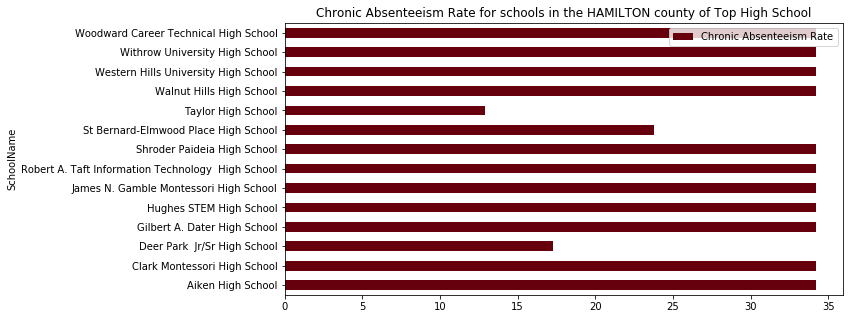

In [22]:

##Analyse the Abseteeism, lower the better for all schools in Hamilton county, that has the 
##Top High School "Walnut Hills High School" in Ohio
oh_APerf_df2=oh_hamilton_df
oh_APerf_df2.head()
oh_APerf_df3=oh_APerf_df2[['SchoolName',"Chronic Absenteeism Rate 2017-18"]]
#print(oh_APerf_df3)
##Remove rows that have column value as "N" or "*"
oh_APerf_df3 = oh_APerf_df3[~oh_APerf_df3['Chronic Absenteeism Rate 2017-18'].isin(['N','*'])];
oh_APerf_df3['Chronic Absenteeism Rate 2017-18']=oh_APerf_df3["Chronic Absenteeism Rate 2017-18"].astype('float32')
#print(oh_APerf_df3)
oh_df1_abs=oh_APerf_df3.groupby(['SchoolName']).agg({'Chronic Absenteeism Rate 2017-18':['mean']}).reset_index()
oh_df1_abs.columns = (['SchoolName','Chronic Absenteeism Rate'])
#oh_df1_abs
oh_df1_abs.plot.barh(x='SchoolName', y='Chronic Absenteeism Rate', colormap='Reds_r', sort_columns=True, figsize=(10,5), title="Chronic Absenteeism Rate for schools in the HAMILTON county of Top High School")

<h3>Comparing New Jersey and Ohio state TOP high School</h3>

<h4>College Preparedness - ACT</h4>

/home/jupyterlab/conda/lib/python3.6/site-packages/xlrd/xlsx.py:266: PendingDeprecationWarning: This method will be removed in future versions.  Use 'tree.iter()' or 'list(tree.iter())' instead.
  for elem in self.tree.iter() if Element_has_iter else self.tree.getiterator():


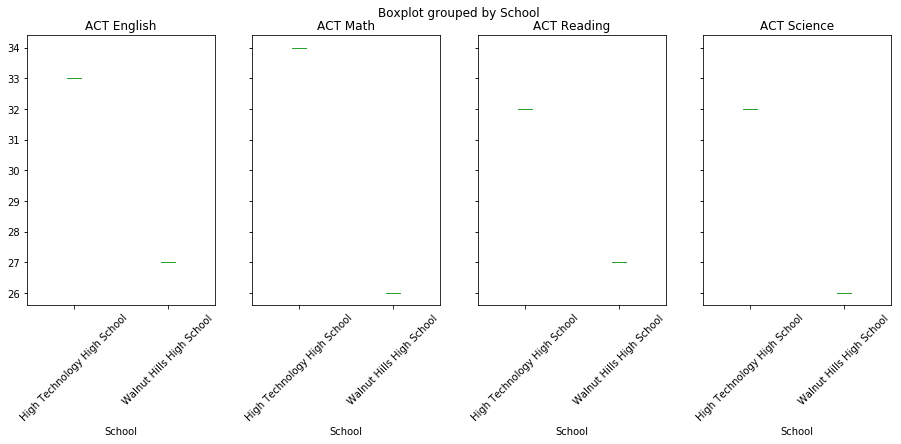

In [23]:
##Compare ACT scores for college prepairedness
f_df=pd.read_excel('OH_NewJersey-HS-1.xlsx')
#print(f_df.head())
f_df = f_df.set_index("School")
axes=f_df.boxplot(by='School', column=['ACT_E','ACT_M', 'ACT_R', 'ACT_S'], layout=(1,4),figsize=(15,5), rot=45, grid=False);
axes[0].set_title('ACT English');
axes[1].set_title("ACT Math");
axes[2].set_title("ACT Reading");
axes[3].set_title("ACT Science");

<h4>College Preparedness - SAT</h4>

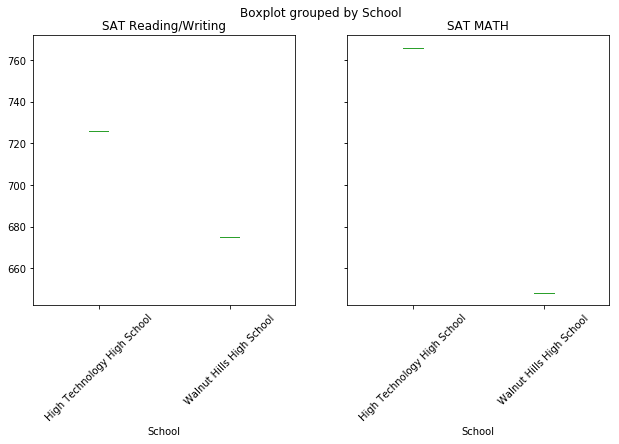

In [24]:
##Compare SAT scores for college prepairedness
f_df=pd.read_excel('OH_NewJersey-HS-1.xlsx')
f_df.head()
f_df = f_df.set_index("School")
ax=f_df.boxplot(by='School', column=['SAT_RW','SAT_M'], figsize=(10,5), rot=45, grid=False);
ax[0].set_title('SAT Reading/Writing');
ax[1].set_title('SAT MATH');

<h4>Other Factors</h4>

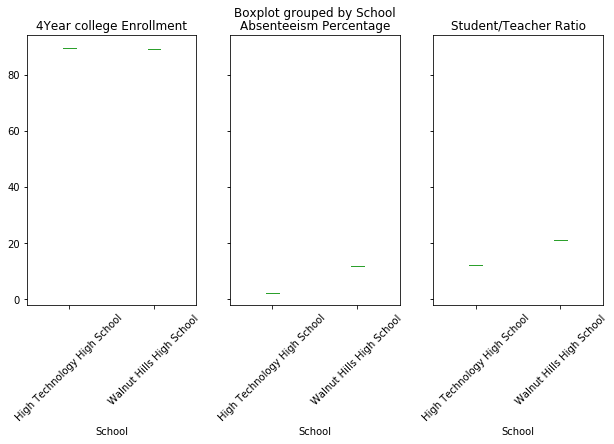

In [25]:
f_df=pd.read_excel('OH_NewJersey-HS-1.xlsx')
f_df.head()
f_df = f_df.set_index("School")
ax=f_df.boxplot(by='School', column=['4YrCollegeEnrollmentPercent','AbsenteeismPercent', 'StudentTeacherRatio'], layout=(1,3),figsize=(10,5), rot=45, grid=False);
ax[0].set_title('4Year college Enrollment');
ax[1].set_title('Absenteeism Percentage');
ax[2].set_title('Student/Teacher Ratio');

#### Define Foursquare Credentials and Version

In [27]:
CLIENT_ID = 'IUS4CDEJLKLQ0RUUAG1EDTSGSL0UIPVBNRPIAQVGBPHKVAY5' # your Foursquare ID
CLIENT_SECRET = 'VERTQMOQ5AHREYAGP5SKVVCCPXY532HW5O2NYJBAXNCEGTOJ' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: IUS4CDEJLKLQ0RUUAG1EDTSGSL0UIPVBNRPIAQVGBPHKVAY5
CLIENT_SECRET:VERTQMOQ5AHREYAGP5SKVVCCPXY532HW5O2NYJBAXNCEGTOJ


#### Now, let's get the top 10 venues that are in vicinity of Top High school in New Jersey within a radius of 1 mile.

In [36]:
##New Jersey Top 10 venues around the Top High School 'High Technology High School'
address = '765 NEWMAN SPRINGS ROAD, LINCROFT, NJ 07738-0119'
geolocator = Nominatim(user_agent="nj_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude


print('The geograpical coordinate of Top New Jersey High Schools is {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Top New Jersey High Schools is 40.3262704, -74.1314886709229.


In [ ]:
# type your answer here
LIMIT=10
radius=1600
url='https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude, 
    longitude, 
    radius, 
    LIMIT)
url

In [30]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5c9ca4a54434b9612e14cb4e'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'},
    {'name': '$-$$$$', 'key': 'price'}]},
  'headerLocation': 'Middletown',
  'headerFullLocation': 'Middletown',
  'headerLocationGranularity': 'city',
  'totalResults': 25,
  'suggestedBounds': {'ne': {'lat': 40.340670414400016,
    'lng': -74.11263549463966},
   'sw': {'lat': 40.31187038559998, 'lng': -74.15034184720615}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4beeaab635dc0f47c311405b',
       'name': 'Thompson Park',
       'location': {'address': '805 Newman Springs Rd',
        'lat': 40.33306723788628,
        'lng': -74.13891792297363,
        'labeledLatLngs': [{'label': 'di

In [31]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [32]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues

,name,categories,lat,lng
0,Thompson Park,Park,40.333067,-74.138918
1,Brookdale Performing Arts Center,Theater,40.326948,-74.133983
2,Monmouth Museum,Museum,40.326607,-74.134910
3,Lincroft Little League,Baseball Field,40.329799,-74.127698
4,Luigi's Famous Pizza,Pizza Place,40.331883,-74.120554
5,Queso Mexican Grill & Salad Bar,Mexican Restaurant,40.331768,-74.120388
6,Joyce's Subs & Pizza,Deli / Bodega,40.330924,-74.119404
7,Thompson Park Dog Park,Dog Run,40.334823,-74.144219
8,Retro Fitness,Gym / Fitness Center,40.331909,-74.122992
9,Dunkin' Donuts,Donut Shop,40.330695,-74.119434


#### Map the top 10 venues around the school, blue circle represents the school.

In [35]:
# create map using latitude and longitude values
map_nj_MONMOUTH = folium.Map(location=[latitude, longitude], zoom_start=13)

# add markers to map
label="HIGH TECHNOLOGY HIGH SCHOOL"

folium.CircleMarker(
        [latitude, longitude],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_nj_MONMOUTH)  
    

for lat, lng, label in zip(nearby_venues['lat'], nearby_venues['lng'], nearby_venues['name']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_nj_MONMOUTH)
    
map_nj_MONMOUTH

## Now, let's get the top 10 venues that are in vicinity of Top High school in Ohio within a radius of 1 mile.

In [41]:
##ohio Top 10 venues around the Top High School "Walnut Hills High School"
oh_address = '3250 Victory Pkwy, Cincinnati, Ohio 45207'
oh_geolocator = Nominatim(user_agent="nj_explorer")
oh_location = oh_geolocator.geocode(oh_address)
oh_latitude = oh_location.latitude
oh_longitude = oh_location.longitude


print('The geograpical coordinate of Top Ohio High Schools is {}, {}.'.format(oh_latitude, oh_longitude))

The geograpical coordinate of Top Ohio High Schools is 39.1391738086653, -84.4821006549275.


In [42]:
# type your answer here
LIMIT=10
radius=1600
url='https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    oh_latitude, 
    oh_longitude, 
    radius, 
    LIMIT)
print(url)
results = requests.get(url).json()
results

https://api.foursquare.com/v2/venues/explore?&client_id=IUS4CDEJLKLQ0RUUAG1EDTSGSL0UIPVBNRPIAQVGBPHKVAY5&client_secret=VERTQMOQ5AHREYAGP5SKVVCCPXY532HW5O2NYJBAXNCEGTOJ&v=20180605&ll=39.1391738086653,-84.4821006549275&radius=1600&limit=10


{'meta': {'code': 200, 'requestId': '5c9ca6ccf594df6af04d4509'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'},
    {'name': '$-$$$$', 'key': 'price'}]},
  'headerLocation': 'Evanston',
  'headerFullLocation': 'Evanston, Cincinnati',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 43,
  'suggestedBounds': {'ne': {'lat': 39.153573823065315,
    'lng': -84.46356938946765},
   'sw': {'lat': 39.12477379426528, 'lng': -84.50063192038736}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4b76ed85f964a520616b2ee3',
       'name': 'Walnut Hills High School',
       'location': {'address': '3250 Victory Pkwy',
        'lat': 39.14096654787196,
        'lng': -84.47936134468733,
        'labeledL

In [43]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues

,name,categories,lat,lng
0,Walnut Hills High School,High School,39.140967,-84.479361
1,Listermann Brewing Co.,Brewery,39.146470,-84.472237
2,O Pie O,American Restaurant,39.129663,-84.477546
3,The Woodburn Brewery & Taproom,Beer Bar,39.129030,-84.476892
4,Delicio Coal Fired Pizza (University Station),Pizza Place,39.146588,-84.467892
5,Cintas Center,College Basketball Court,39.150433,-84.471833
6,Brew House,American Restaurant,39.125547,-84.486126
7,Suzie Wong's On Madison,Asian Restaurant,39.129795,-84.476955
8,Skyline Chili,Hot Dog Joint,39.125855,-84.483707
9,The Growler House,Bar,39.129763,-84.477778


#### Map the top 10 venues around the school, blue circle represents the school.

In [44]:
# create map using latitude and longitude values
map_oh_hamilton = folium.Map(location=[oh_latitude, oh_longitude], zoom_start=13)

# add markers to map
label="Walnut Hills High School"

folium.CircleMarker(
        [oh_latitude, oh_longitude],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_oh_hamilton)  
    

for lat, lng, label in zip(nearby_venues['lat'], nearby_venues['lng'], nearby_venues['name']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_oh_hamilton)
    
map_oh_hamilton